In [43]:
import matplotlib.pyplot as plt
import pandas as pd
from path import Path

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder,OneHotEncoder 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [44]:
# Load data
file_path=Path("chocolate.csv")
chocolate_df = pd.read_csv(file_path)

chocolate_df.head()

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [45]:
chocolate_df.shape

(2224, 21)

In [5]:
chocolate_df.drop(columns=chocolate_df.columns[0], axis=1, inplace=True)
chocolate_df.head()

,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


In [6]:
chocolate_df.drop(["ref", "company", "review_date", "specific_bean_origin_or_bar_name", "beans","first_taste","second_taste", "third_taste", "fourth_taste"], axis=1, inplace=True)
chocolate_df

,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,U.S.A,Madagascar,76.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,U.S.A,Dominican republic,76.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,U.S.A,Tanzania,76.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,France,Peru,63.0,3.75,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,France,Bolivia,70.0,3.50,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
...,...,...,...,...,...,...,...,...,...,...,...
2219,Austria,Blend,80.0,2.75,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar
2220,Austria,Colombia,75.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2221,Austria,Belize,72.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2222,Austria,Congo,70.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [7]:
chocolate_df.describe()

,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000
mean,71.493930,3.198561,3.075989
std,5.278253,0.434329,0.929875
min,42.000000,1.000000,1.000000
25%,70.000000,3.000000,2.000000
50%,70.000000,3.250000,3.000000
75%,74.000000,3.500000,4.000000
max,100.000000,4.000000,6.000000


In [8]:
chocolate_df.dtypes

company_location            object
country_of_bean_origin      object
cocoa_percent              float64
rating                     float64
counts_of_ingredients        int64
cocoa_butter                object
vanilla                     object
lecithin                    object
salt                        object
sugar                       object
sweetener_without_sugar     object
dtype: object

In [9]:
chocolate_df.isna().sum()

company_location           0
country_of_bean_origin     0
cocoa_percent              0
rating                     0
counts_of_ingredients      0
cocoa_butter               0
vanilla                    0
lecithin                   0
salt                       0
sugar                      0
sweetener_without_sugar    0
dtype: int64

In [10]:
chocolate_df.nunique()

company_location           66
country_of_bean_origin     62
cocoa_percent              46
rating                     13
counts_of_ingredients       6
cocoa_butter                2
vanilla                     2
lecithin                    2
salt                        2
sugar                       2
sweetener_without_sugar     2
dtype: int64

In [11]:
chocolate_df.head()

,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,U.S.A,Madagascar,76.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,U.S.A,Dominican republic,76.0,3.50,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,U.S.A,Tanzania,76.0,3.25,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,France,Peru,63.0,3.75,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,France,Bolivia,70.0,3.50,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [24]:
uniqueValues=chocolate_df['company_location'].unique()
print(uniqueValues)

['U.S.A' 'France' 'Fiji' 'Vanuatu' 'Ecuador' 'Mexico' 'Switzerland'
 'Netherlands' 'Spain' 'Peru' 'Canada' 'Italy' 'Brazil' 'Nicaragua' 'U.k.'
 'Australia' 'Philippines' 'Wales' 'Belgium' 'Vietnam' 'Germany'
 'Singapore' 'Venezuela' 'Malaysia' 'Russia' 'South korea' 'Taiwan'
 'Puerto rico' 'Colombia' 'Japan' 'New zealand' 'Costa rica' 'Hungary'
 'Scotland' 'Martinique' 'Sao tome' 'St. lucia' 'Guatemala' 'South africa'
 'Dominican republic' 'Sao tome & principe' 'Bolivia' 'Portugal' 'Norway'
 'Denmark' 'Grenada' 'Israel' 'India' 'St.vincent-grenadines'
 'Czech republic' 'Thailand' 'Finland' 'Madagascar' 'Sweden' 'Poland'
 'Austria' 'Honduras' 'U.a.e.' 'Lithuania' 'Ireland' 'Chile' 'Ghana'
 'Iceland' 'Argentina' 'Suriname' 'El salvador']


In [25]:
uniqueBeanOrigin=chocolate_df['country_of_bean_origin'].unique()
print(uniqueBeanOrigin)

['Madagascar' 'Dominican republic' 'Tanzania' 'Peru' 'Bolivia' 'Venezuela'
 'Ecuador' 'Brazil' 'Papua new guinea' 'Burma' 'Panama' 'Colombia' 'Cuba'
 'Togo' 'Sao tome' 'Mexico' 'Fiji' 'Vanuatu' 'Indonesia' 'Trinidad'
 'Vietnam' 'Nicaragua' 'Ghana' 'Belize' 'Blend' 'Grenada' 'Jamaica'
 'Guatemala' 'Costa rica' 'Honduras' 'Haiti' 'India' 'Congo' 'Philippines'
 'Solomon islands' 'Uganda' 'Malaysia' 'Sri lanka' 'Ivory coast' 'Gabon'
 'Taiwan' 'Puerto rico' 'Martinique' 'St. lucia' 'Australia' 'Liberia'
 'Sierra leone' 'Nigeria' 'U.s.a.' 'St.vincent-grenadines' 'Thailand'
 'Tobago' 'Bolvia' 'Sumatra' 'El salvador' 'Cameroon' 'Samoa'
 'Sao tome & principe' 'Principe' 'Sulawesi' 'Suriname' 'Dr congo']


In [12]:
print("Least liked chocolates: ")
chocolate_df[chocolate_df['rating'] == 1]

Least liked chocolates: 


,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
1479,Belgium,Blend,73.0,1.0,5,have_cocoa_butter,have_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [13]:
print("Most liked chocolates: ")
chocolate_df[chocolate_df['rating'] >= 3.70]

Most liked chocolates: 


,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,U.S.A,Madagascar,76.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,France,Peru,63.0,3.75,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
5,France,Venezuela,70.0,4.00,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
6,France,Peru,63.0,4.00,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
7,France,Ecuador,70.0,3.75,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
...,...,...,...,...,...,...,...,...,...,...,...
2199,Belgium,Nicaragua,70.0,3.75,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2204,Austria,Peru,70.0,3.75,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar
2208,Austria,Dominican republic,62.0,3.75,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar
2209,Austria,Dominican republic,70.0,3.75,4,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar


<AxesSubplot:xlabel='cocoa_percent', ylabel='rating'>

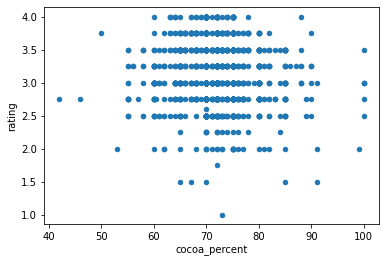

In [14]:
chocolate_df.plot.scatter("cocoa_percent", "rating")

In [38]:
#round the numbers in the ratings column
chocolate_df['rating']=chocolate_df['rating'].apply(lambda x: round(x,0))
chocolate_df.head()

,company_location,country_of_bean_origin,cocoa_percent,rating,counts_of_ingredients,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar
0,U.S.A,Madagascar,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
1,U.S.A,Dominican republic,76.0,4.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
2,U.S.A,Tanzania,76.0,3.0,3,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
3,France,Peru,63.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar
4,France,Bolivia,70.0,4.0,4,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar


In [39]:
#get dummies for string characters
X = pd.get_dummies(chocolate_df, columns=['cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar','sweetener_without_sugar']).drop('rating', axis=1)

# Create target
y = chocolate_df['rating']
X.head(10)

,company_location,country_of_bean_origin,cocoa_percent,counts_of_ingredients,cocoa_butter_have_cocoa_butter,cocoa_butter_have_not_cocoa_butter,vanilla_have_not_vanila,vanilla_have_vanila,lecithin_have_lecithin,lecithin_have_not_lecithin,salt_have_not_salt,salt_have_salt,sugar_have_not_sugar,sugar_have_sugar,sweetener_without_sugar_have_not_sweetener_without_sugar,sweetener_without_sugar_have_sweetener_without_sugar
0,U.S.A,Madagascar,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
1,U.S.A,Dominican republic,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
2,U.S.A,Tanzania,76.0,3,1,0,1,0,0,1,1,0,0,1,1,0
3,France,Peru,63.0,4,1,0,1,0,1,0,1,0,0,1,1,0
4,France,Bolivia,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
5,France,Venezuela,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
6,France,Peru,63.0,3,1,0,1,0,0,1,1,0,0,1,1,0
7,France,Ecuador,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
8,France,Peru,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0
9,France,Brazil,70.0,4,1,0,1,0,1,0,1,0,0,1,1,0


In [ ]:
#scale down the Cocoa Percent, since the values are so much bigger than any other column

#sc = StandardScaler()

#sc.fit(X_train['cocoa_percent'].values.reshape(-1, 1))

#X_train['cocoa_percent'] = sc.transform(X_train['cocoa_percent'].values.reshape(-1, 1))
#X_test['cocoa_percent'] = sc.transform(X_test['cocoa_percent'].values.reshape(-1, 1))

#X_train.head()